<a href="https://colab.research.google.com/github/Dan22dongwon/DeeplearningQuest/blob/main/4_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%AA%A8%EB%8D%B8_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 들어가며

안녕하세요!

딥러닝의 학습 방법을 탐구하려 오신 여러분을 환영합니다.

딥러닝이 공부하는 방법을 공부한다니, 마치 메타 러닝(Meta learining; 딥러닝 학습 방식 중 하나로 학습 방법을 학습한다)같은 느낌이네요!

그럼 Deep Learning의 learning을 deep하게 탐구할 준비 되셨나요?

가볍게 몸풀기로 아래 질문에 대해서 생각하면서 시작해봅시다.


과정 개요
## 4-2. 손실 함수(Loss Function)
딥러닝 학습에서 손실 함수의 역할은 무엇인지 파악하고 각각의 손실 함수의 동작과 특징을 살펴봅니다.

## 4-3. 옵티마이저(Optimizer)와 지표
딥러닝 학습에서 옵티마이저의 역할은 무엇이고 딥러닝 학습의 핵심으로 볼 수 있는 경사하강법에 대해서 배웁니다.

## 4-4. 딥러닝 모델 학습
실습을 통해 딥러닝이 학습되는 과정을 이해하고 경험해봅니다.

## 학습 목표
딥러닝 모델을 학습하기 위한 개념을 설명할 수 있습니다.
손실 함수, 옵티마이저, 지표에 대해서 설명할 수 있습니다.

### 데이터 생성

선형회귀(Linear Regression)를 위한 딥러닝 모델 을 만들어보도록 하겠습니다. 먼저 데이터셋을 make_regression 함수를 이용하여 입력 X와 정답

y로 샘플 갯수(n_samples) 200개, 특징 갯수(n_featrues) 1개에 바이어스(bias)는 5.0, 노이즈(noise)는 5.0으로 지정하고, random_state는 123으로 하여 랜덤 시드를 지정해줍니다.

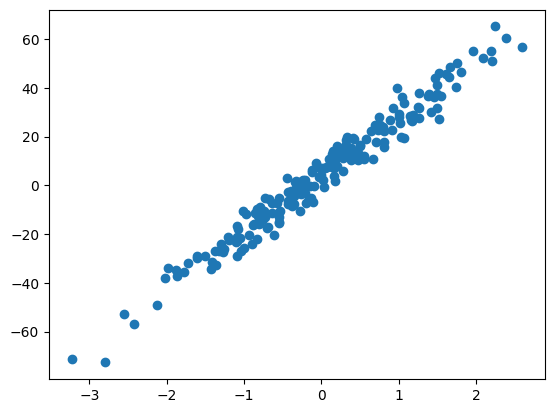

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1,
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

데이터는 학습용 데이터셋(x_train, y_train), 테스트용 데이터셋(x_test, y_test)으로 구분합니다.

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


## 모델 생성
먼저 딥러닝을 사용하는데 필요한 라이브러리인 Tensorflow와 keras를 임포트합니다. 케라스(Keras)의 모델, 레이어, 옵티마이저, 유틸을 사용할 수 있도록 models, layers, optimizer, utils도 임포트합니다.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

모델은 간단하게 Sequential()을 이용해 선언하고, Dense 레이어 하나를 추가해줍니다. 레이어의 유닛수는 1개이고, activation은 선형 회귀이니 'linear'로 지정하며, input_shape은 (1,) 으로 1차원 모양으로 입력 모양을 가집니다. 최종 모델의 구조를 summary() 함수를 통해 확인해봅니다.

In [4]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


어떤 모델이 생성되었는지 그림으로 확인해 볼까요?

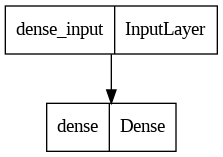

In [5]:
utils.plot_model(model)

### 모델 학습
딥러닝 모델의 학습 진행 방식을 결정하는 옵티마이저(optimizer)로 SGD(Stochastic Gradient Descent) 를 사용합니다. compile() 함수를 통해서 손실 함수(loss function), 옵티마이저(optimizer), 지표(metrics)를 지정합니다.

모델의 학습에 필요한 손실 함수로 mse를 지정하여 Mean Square Error를 사용하고, 옵티마이저는 정의했던 SGD를 사용합니다. 지표로는 mae와 mse를 사용하는데 여기서 MAE는 Mean Absolute Error를 의미합니다.

이제 모델 학습을 진행하기위해 fit() 함수를 호출합니다. 학습을 위해 x_train과 y_train를 지정하고, 학습 반복 횟수인 epochs를 40으로 지정합니다.

In [6]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 1s 6ms/step - loss: 667.5944 - mae: 20.6860 - mse: 667.5944
Epoch 2/40
5/5 [==============================] - 0s 4ms/step - loss: 535.9524 - mae: 18.6310 - mse: 535.9524
Epoch 3/40
5/5 [==============================] - 0s 4ms/step - loss: 431.0568 - mae: 16.6741 - mse: 431.0568
Epoch 4/40
5/5 [==============================] - 0s 4ms/step - loss: 347.3428 - mae: 14.9822 - mse: 347.3428
Epoch 5/40
5/5 [==============================] - 0s 4ms/step - loss: 281.1176 - mae: 13.5279 - mse: 281.1176
Epoch 6/40
5/5 [==============================] - 0s 3ms/step - loss: 228.2421 - mae: 12.1097 - mse: 228.2421
Epoch 7/40
5/5 [==============================] - 0s 3ms/step - loss: 185.8244 - mae: 10.9488 - mse: 185.8244
Epoch 8/40
5/5 [==============================] - 0s 4ms/step - loss: 152.3508 - mae: 9.8941 - mse: 152.3508
Epoch 9/40
5/5 [==============================] - 0s 4ms/step - loss: 125.5526 - mae: 8.9813 - mse: 125.5526
Epoch 10/40


모델이 학습하면서 각 epoch 마다 저장한 mae와 mse 지표를 차트를 통해서 확인합니다.

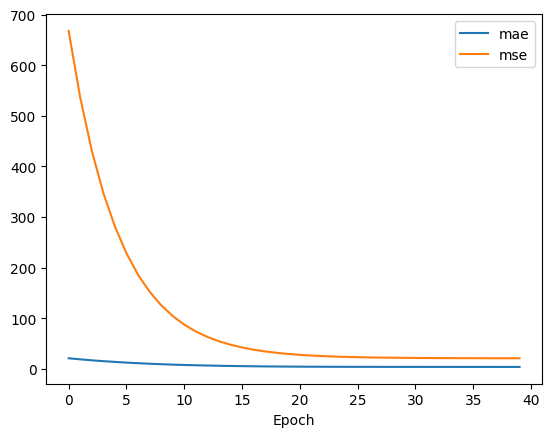

In [7]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

### 모델 평가
이제 모델의 평가를 위해 evaluate() 함수를 이용하여 데이터셋인 x_test, y_test에 대해서 지표인 mae와 mse를 확인합니다.

In [8]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 21.9597 - mae: 3.9910 - mse: 21.9597


[21.95970344543457, 3.990997314453125, 21.95970344543457]

## 모델 예측
학습된 모델을 통해 입력 데이터
X에 대한 예측값을 predict()를 통해 결과로 받아옵니다. 실제 데이터의 결과값
y와 모델의 예측 결과인 result를 살펴봅니다.

7/7 [==============================] - 0s 2ms/step


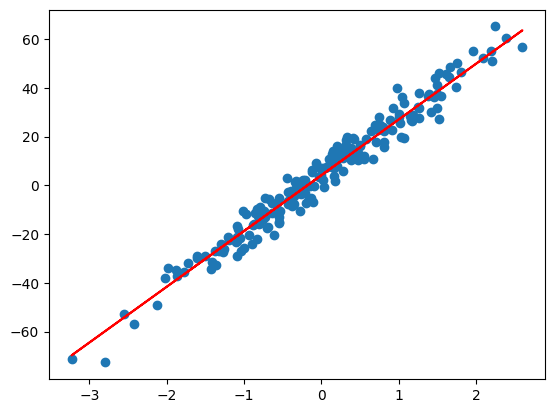

In [9]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

딥러닝 모델에서 사용한 레이어를 layers로 접근하여 살펴볼 수 있습니다. 여기에서는 Dense 레이어 하나만 사용된 것을 알 수 있습니다.

In [10]:
model.layers

모델의 0번째 레이어인 layers[0]를 가져와서 layer.name으로 레이어의 이름을 확인할 수 있습니다. 또한, get_layer() 함수를 통해 같은 이름의 레이어를 얻을 수도 있습니다.

In [11]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense')
print(layer.name)

dense
dense


레이어에서 사용하는 가중치(weights)와 바이어스(biases)를 get_weights() 함수를 통해서 얻을 수 있습니다. 즉, 레이어에 있는 가중치와 바이어스를 통해 선형 회귀식을 얻을 수 있습니다.

In [12]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.883266]]
[4.17474]


딥러닝 모델에서 학습된 가중치(weights)와 바이어스(biases)를 통해 선형회귀식을 np.array(weights * X + biases)로 표현할 수 있습니다.

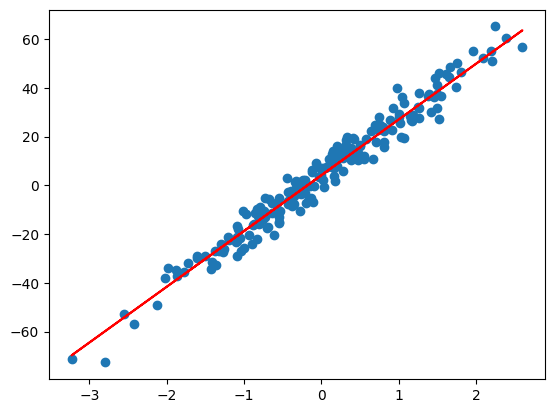

In [13]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()

## 마무리하며

## 이번 시간 정리
- 딥러닝 모델을 학습하는 구성과 관련 요소들을 이해했습니다.
- 모델이 잘 학습되고 있는지 비교를 위해 사용하는 손실함수에 대해서 이해했습니다.
- 모델이 어떻게 업데이트되어야 하는지 결정하는 옵티마이저에 대해서 이해했습니다.

## 종합 문제
딥러닝 모델 학습에 대해 공부하시느라 모두 수고하셨습니다.
그럼 간단한 퀴즈로 마무리해보는 시간을 가져보겠습니다.

Q. 사람과 달리 딥러닝의 학습은 어떻게 이루어지는지 딥러닝을 처음 접하는 사람에게 설명하실 수 있을까요?


:실제 정답과 딥러닝 모델이 예측한 정답을 비교하여 실제 정답에 가깝게 예측할 수 있도록 스스로 학습합니다.